In [1]:
import matplotlib.pyplot as plt
import numpy as np
import TPI
from few.trajectory.inspiral import EMRIInspiral
from few.utils.utility import get_overlap, get_mismatch, get_separatrix, get_fundamental_frequencies

In [2]:
Nx1 = 128
Nx2 = 128
amin = -0.998
amax = 0.998
emin,emax = 0.0, 0.9

def a_to_chi2(a):
    scale=3.
    y = (1-a)**(1/scale)
    ymin = (1-amax)**(1/scale)
    ymax = (1+amax)**(1/scale)
    return (y-ymin)/(ymax-ymin)

def chi2_to_a(chi2):
    scale=3.
    ymin = (1-amax)**(1/scale)
    ymax = (1+amax)**(1/scale)
    return 1-(chi2*(ymax-ymin)+ymin)**scale


newx1 = np.linspace(0,1,num=Nx1)
newx2 = np.linspace(emin**0.5,emax**0.5,num=Nx2)

In [3]:
y,sqrtecc = np.meshgrid(newx1,newx2, indexing='ij')
y.shape,sqrtecc.shape

((128, 128), (128, 128))

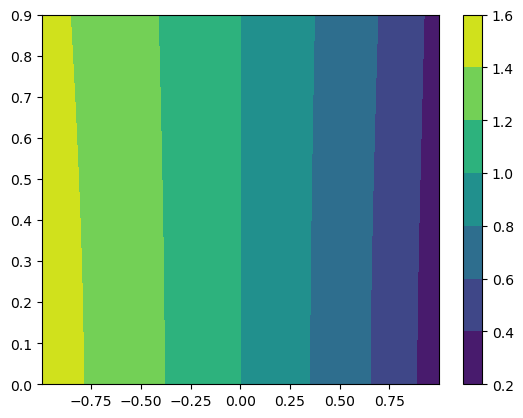

In [4]:
newX = [newx1,newx2]

to_interp = []

spin = chi2_to_a(y.flatten())
e = sqrtecc.flatten()**2
to_interp = get_separatrix(np.abs(spin), e, np.sign(spin)*1.0)/(6.+2.*e)

plt.tricontourf(spin,e,to_interp)
plt.colorbar()

In [5]:
to_interp_flat = np.asarray(to_interp).reshape((Nx1, Nx2))
InterpSep  = TPI.TP_Interpolant_ND(newX, F=to_interp_flat)


In [6]:
check_a = np.random.uniform(-0.99,0.99, size=10_000)
check_e = np.random.uniform(0., 0.8, size=10_000)
check_x = 2.*(check_a > 0) - 1
check_a_in = np.abs(check_a)
check_seps = np.array([get_separatrix(ai, ei, xi) for ai, ei, xi in zip(check_a_in, check_e, check_x)])

interps_in = np.vstack((a_to_chi2(check_a), check_e**0.5)).T

interp_seps = np.array([InterpSep(interps_in[k]) *  (6.+2.*check_e[k]) for k in range(len(interps_in))])

In [21]:
check_interp = interps_in[0]
check_e_val = check_e[0]
check_a_val = check_a[0]
check_x = np.sign(check_a_val)

-0.6882972974427937

In [17]:
%timeit InterpSep(check_interp)*(6+2*check_e_val)

5.04 µs ± 12.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
%timeit get_separatrix(-check_a_val, check_e_val, check_x)

8.06 µs ± 18.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
interps_in[0], interp_seps[0], check_seps[0]

(array([0.93933644, 0.85618212]), 9.951064766172127, 9.951064766223224)

Text(0.5, 0, 'Relative error')

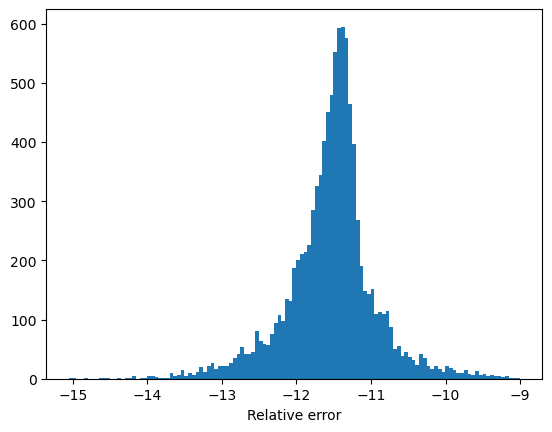

In [8]:
errs = np.abs(1-interp_seps/check_seps)
errs[errs == 0] = np.nan
plt.hist(np.log10(errs),bins='auto')
plt.xlabel('Relative error')

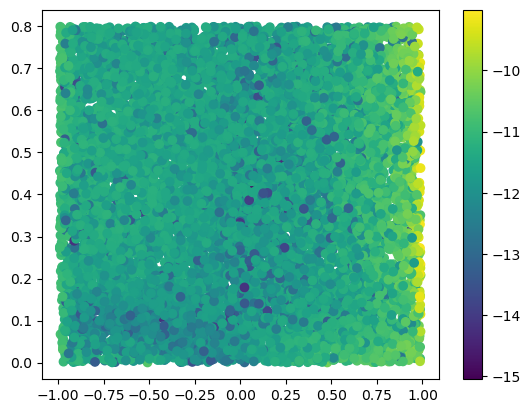

In [9]:
poins = plt.scatter(check_a, check_e, c=np.log10(errs))
plt.colorbar(poins)

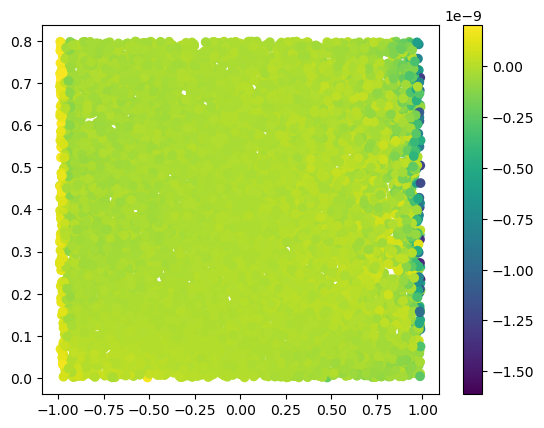

In [10]:
poins = plt.scatter(check_a, check_e, c=interp_seps-check_seps)
plt.colorbar(poins)

In [14]:
np.save('few/files/sepX.npy',np.array(newX))
np.save('few/files/sepVals.npy',np.array(to_interp_flat))